<a href="https://colab.research.google.com/github/Ghada-Bel/Optify/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

main

In [9]:
!pip install nltk scikit-learn pandas matplotlib


In [10]:
import nltk
import pandas as pd
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
df = pd.DataFrame(documents, columns=['review', 'category'])


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [11]:
df

,review,category
0,"plot : two teen couples go to a church party ,...",neg
1,the happy bastard's quick movie review \ndamn ...,neg
2,it is movies like these that make a jaded movi...,neg
3,""" quest for camelot "" is warner bros . ' firs...",neg
4,synopsis : a mentally unstable man undergoing ...,neg
...,...,...
1995,wow ! what a movie . \nit's everything a movie...,pos
1996,"richard gere can be a commanding actor , but h...",pos
1997,"glory--starring matthew broderick , denzel was...",pos
1998,steven spielberg's second epic film on world w...,pos


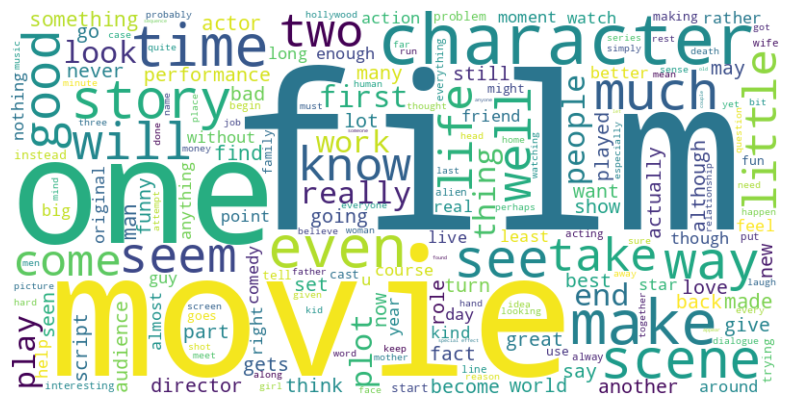

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


text = " ".join(review for review in df.review)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:



from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(w) for w in words if w not in stopwords.words('english') and len(w) > 2]
    return " ".join(words)




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [14]:
# Apply preprocessing function to the dataset

df['cleaned_text'] = df['review'].apply(preprocess_text)

In [15]:
df

,review,category,cleaned_text
0,"plot : two teen couples go to a church party ,...",neg,plot two teen couple church party drink drive ...
1,the happy bastard's quick movie review \ndamn ...,neg,happy bastard quick movie review damn y2k bug ...
2,it is movies like these that make a jaded movi...,neg,movie like make jaded movie viewer thankful in...
3,""" quest for camelot "" is warner bros . ' firs...",neg,quest camelot warner bros first feature length...
4,synopsis : a mentally unstable man undergoing ...,neg,synopsis mentally unstable man undergoing psyc...
...,...,...,...
1995,wow ! what a movie . \nit's everything a movie...,pos,wow movie everything movie funny dramatic inte...
1996,"richard gere can be a commanding actor , but h...",pos,richard gere commanding actor always great fil...
1997,"glory--starring matthew broderick , denzel was...",pos,glory starring matthew broderick denzel washin...
1998,steven spielberg's second epic film on world w...,pos,steven spielberg second epic film world war un...


In [19]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


params = {'C': [0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), params, cv=5)
grid.fit(X_train, y_train)

print("Best score:", grid.best_score_)
print("Best parameters:", grid.best_params_)

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])


y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Best score: 0.85
Best parameters: {'C': 10}
Accuracy: 82.00%
